In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

setting up gating dynamics


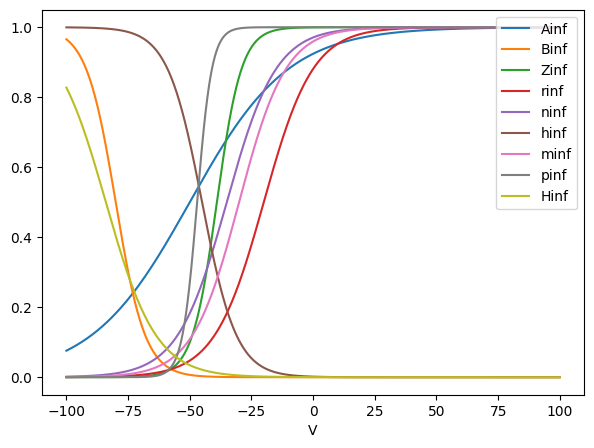

gating dynamic setup completed


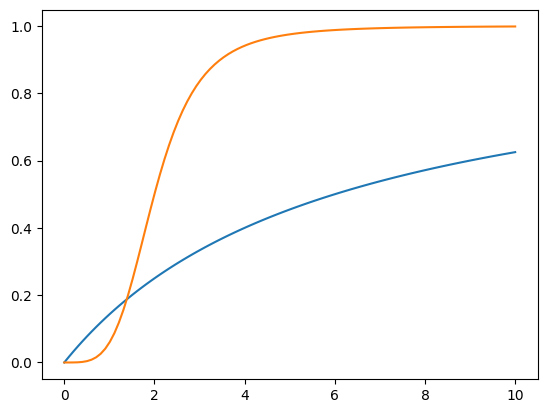

In [5]:
print("setting up gating dynamics")
#gating varibles
tauq0 = 200
aq=2
Ca_acum = np.linspace(0.0001, 10, 100)

def minf(V):
    return 1.0/(1+np.exp(-(V--30)/9.5))
def hinf(V):
    return  1.0/(1+np.exp(-(V--45)/-7))
def tauh(V):
    return 0.1 + 0.75*(1.0/(1+np.exp(-(V--40.5)/-6)))
def ninf(V):
    return 1.0/(1+np.exp(-(V--35)/10))
def taun(V):
    return 0.1 + 0.5*(1.0/(1+np.exp(-(V--27)/-15)))
def pinf(V):
    return 1.0/(1+np.exp(-(V--47)/3))#can range from -47 to -41 #
def rinf(V):
    return 1/ (1 + np.exp(-(V--20)/10))
def Zinf(V):
    return 1.0/(1+np.exp(-(V--39)/5))
def Ainf(V):
    return 1.0/(1+np.exp(-(V--50)/20))
def Binf(V):
    return 1.0/(1+np.exp(-(V--80)/-6))
def Hinf(V):
    return 1./(1. + np.exp((V + 84.)/10.2))
def tauH(V):
    return  1./(np.exp(-17.9 - 0.116*V ) + np.exp(-1.84 + 0.09*V )) + 0.1
def cinf(V):
    return  1.0/(1+np.exp(-(V--30)/7))
def dinf(Ca_acum):
    return 1.0/(1+6/Ca_acum)
def Qinf(Ca_acum):
    return 1.0/(1+(aq**4)/(Ca_acum**4))
def Nv(V):
    return ( 1+np.tanh((V)/4))
def Nv2(V):
    return ( 1+np.tanh((V)/4))



vv = np.arange(-100,100 , 0.1)
fig = plt.figure(figsize=(7, 5))
#ax = plt.subplot(gs[0])
plt.plot(vv,Ainf(vv),label = "Ainf")
plt.plot(vv,Binf(vv),label = "Binf")
plt.plot(vv,Zinf(vv),label = "Zinf")
plt.plot(vv,rinf(vv),label = "rinf")
plt.plot(vv,ninf(vv), label = "ninf")
plt.plot(vv,hinf(vv), label = "hinf")
plt.plot(vv,minf(vv), label = "minf")
plt.plot(vv,pinf(vv), label = "pinf")
plt.plot(vv,Hinf(vv), label = "Hinf")
plt.legend(loc='upper right')
plt.xlabel("V")

# #ax = plt.subplot(gs[1])
# plt.plot(vv,taun(vv), label = "taun")
# plt.plot(vv,tauh(vv), label = "tauh")
# plt.plot(vv,tauH(vv), label = "tauH")

# plt.legend(loc='upper right')

# plt.xlabel("V")

#ax = plt.subplot(gs[2])
plt.show()
plt.plot(Ca_acum,dinf(Ca_acum))
plt.plot(Ca_acum,Qinf(Ca_acum))

print("gating dynamic setup completed")

In [9]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
def compute_impedance_fft(V, I, dt, smooth_sigma=None, f_max=None):
    N = len(V)
    # FFTs (remove DC offset first!)
    V_fft = np.fft.fft(V - np.mean(V))
    I_fft = np.fft.fft(I - np.mean(I))

    # Impedance spectrum
    Z = np.abs(V_fft / I_fft)[:N//2]
    freqs = np.fft.fftfreq(N, dt/1000)[:N//2]  # dt in ms → s

    # Mask out DC and optionally limit to f_max
    mask = freqs > 1   # throw away 0 Hz
    if f_max is not None:
        mask &= (freqs <= f_max)

    freqs, Z = freqs[mask], Z[mask]

    # Optional smoothing
    if smooth_sigma is not None:
        Z = gaussian_filter1d(Z, sigma=smooth_sigma)

    return freqs, Z




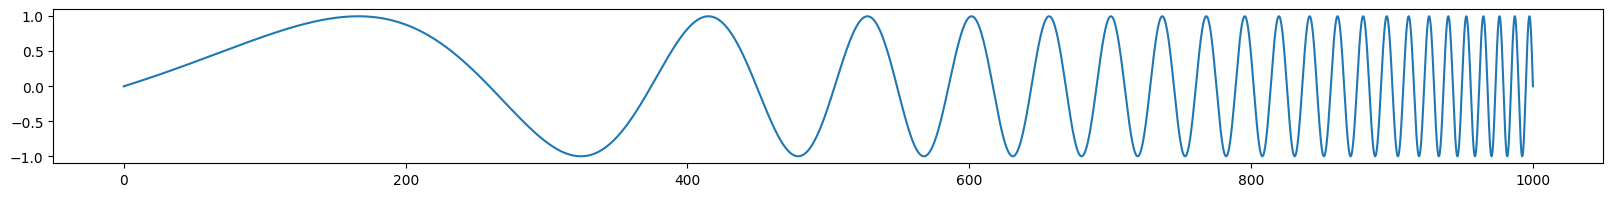

In [10]:

def zap_log(t, f_start=0.0, f_end=100.0, amplitude=1, cycles_per_freq=1, silence_ms=1000):
    T = t[-1] - t[0]
    k = np.log(f_end / f_start) / T
    phase = 2 * np.pi * cycles_per_freq * f_start * (np.exp(k * t) - 1) / k
    I_zap = amplitude * np.sin(phase)
    freq_inst = f_start * np.exp(k * t)
    
    # Set first and last silence_ms milliseconds to zero amplitude
    silence_s = silence_ms / 1000
    I_zap[(t <= silence_s)] = 0
    I_zap[(t >= (t[-1] - silence_s))] = 0
    
    return I_zap, freq_inst
dt = 0.1
t = np.arange(0, 1000, dt)
I_chirp, freq_inst = zap_log(t/1000.0, f_start=1, f_end=100.0, amplitude=1, cycles_per_freq=1, silence_ms=0)

plt.figure(figsize=(20,2))
plt.plot(t, I_chirp)

plt.show()


spike at time  3.3000000000000003
spike at time  5.800000000000001
spike at time  8.5
spike at time  10.9
spike at time  14.9
spike at time  18.900000000000002
spike at time  25.200000000000003
spike at time  29.5
spike at time  40.1
spike at time  51.5
spike at time  58.400000000000006
spike at time  63.5
spike at time  67.5
spike at time  72.0
spike at time  75.9
spike at time  80.10000000000001
spike at time  86.30000000000001
spike at time  94.9
spike at time  101.9
spike at time  106.0
spike at time  110.2
spike at time  115.2
spike at time  118.80000000000001
spike at time  122.7
spike at time  128.20000000000002
spike at time  133.1
spike at time  137.9
spike at time  144.4
spike at time  149.9
spike at time  155.5
spike at time  160.60000000000002
spike at time  166.60000000000002
spike at time  171.10000000000002
spike at time  176.3
spike at time  181.3
spike at time  185.70000000000002
spike at time  191.20000000000002
spike at time  197.10000000000002
spike at time  218.4
s

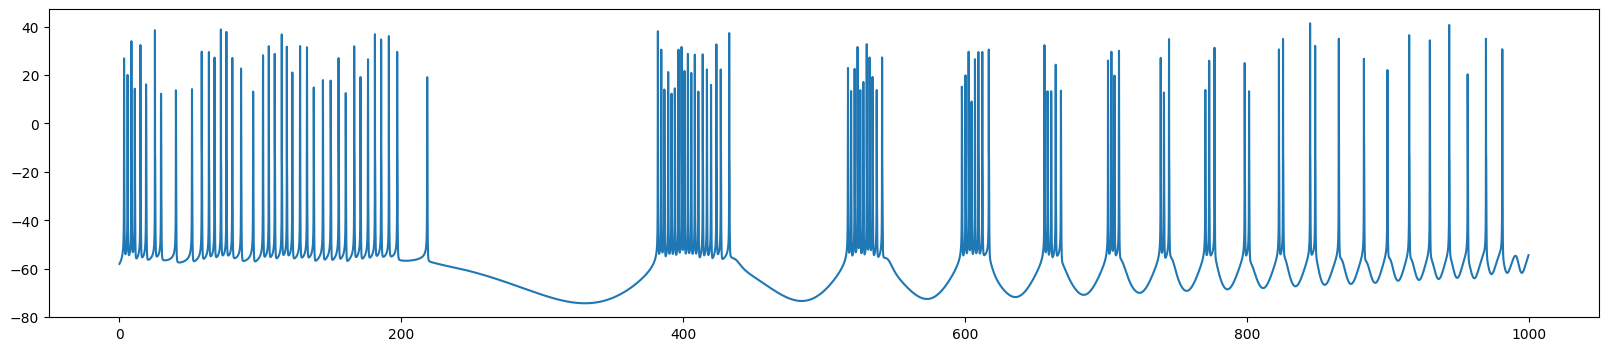

In [11]:
##compex 2 compartment model##

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, find_peaks

def piecewise_constant_white_noise(t, Tdur, D, seed=None):
    if seed is not None:
        np.random.seed(seed)
    eta = np.random.randn(len(t))
    Ieta = np.zeros(len(t))
    for i in range(len(t)):
        Ieta[i] = eta[int(t[i] / Tdur)]
    return np.sqrt(D) * Ieta


dt = 0.1
freqs = np.arange(0, 100,1)
# storage across frequencies

amp = 2

dt = 0.1
Gl, El = 0.1, -58
Ena, Ek, Eh = 60, -75, -32.9
Cm = 1
Gl2 = 0.1
p = 0.5
Gc = 1
Gm = 3#1.58
Gh = 1
Gnap =0.3
Gna = 55
Gk = 10

# ---------- parameters ----------
dt = 0.1
t = np.arange(0, 1000, dt)
I_chirp, freq_inst = zap_log(t/1000.0, f_start=1, f_end=100.0, amplitude=1, cycles_per_freq=1, silence_ms=0)
#noise = piecewise_constant_white_noise(t, Tdur, D)
I_theta = np.ones_like(t) 

# I_theta = np.zeros_like(t)
# pulse_start = 0  # ms
# pulse_end = 1000    # ms
# I_amp = 1         # amplitude

#I_theta[(t >= pulse_start) & (t <= pulse_end)] = I_amp

spike_time = []

# ---------- initialize variables ----------
Vs = np.zeros(len(t))
Vd = np.zeros(len(t))
Hs = np.zeros(len(t))
Hd = np.zeros(len(t))
Zs = np.zeros(len(t))
Zd = np.zeros(len(t))
n = np.zeros(len(t))
h = np.zeros(len(t))

Vs[0] = El
Vd[0] = El
N = len(t)
Gsd = .2
Gds = .02

# ---------- simulation ----------

for k in range(len(t) - 1):

        k1vs = (-Gl*(Vs[k]-El) - Gsd*(Vs[k]-Vd[k]) - Gm*Zs[k]*(Vs[k]-Ek)
                - Gnap*pinf(Vs[k])*(Vs[k]-Ena) -Gna*(minf(Vs[k])**3)*h[k]*(Vs[k]-Ena)
        -Gk*(n[k]**4)* (Vs[k]-Ek) + amp*I_chirp[k]) / Cm
        k1vd = (-Gl2*(Vd[k]-El) - Gh*Hd[k]*(Vd[k]-Eh)
                - Gds*(Vd[k]-Vs[k]) + amp*I_chirp[k])/ Cm

        k1Hs = (Hinf(Vs[k]) - Hs[k]) / tauH(Vs[k])
        k1Hd = (Hinf(Vd[k]) - Hd[k]) / tauH(Vd[k])
        k1Zs = (Zinf(Vs[k]) - Zs[k]) / 75
        k1Zd = (Zinf(Vd[k]) - Zd[k]) / 75
        k1n = (ninf(Vs[k])-n[k])/taun(Vs[k])
        k1h = (hinf(Vs[k])-h[k])/tauh(Vs[k])

        avs = Vs[k] + k1vs * dt
        avd = Vd[k] + k1vd * dt
        aHs = Hs[k] + k1Hs * dt
        aHd = Hd[k] + k1Hd * dt
        aZs = Zs[k] + k1Zs * dt
        aZd = Zd[k] + k1Zd * dt
        an = n[k] + k1n * dt 
        ah = h[k] + k1h * dt 


        k2vs = (-Gl*(avs-El) - Gsd*(avs-avd) - Gm*aZs*(avs-Ek)
                - Gnap*pinf(avs)*(avs-Ena)-Gna*(minf(avs)**3)*ah*(avs-Ena)
        -Gk*(an**4)* (avs-Ek) + amp*I_chirp[k]) / Cm
        k2vd = (-Gl2*(avd-El) - Gh*aHd*(avd-Eh)
                - Gds*(avd-avs) + amp*I_chirp[k])/ Cm

        k2Hs = (Hinf(avs) - aHs) / tauH(avs)
        k2Hd = (Hinf(avd) - aHd) / tauH(avd)
        k2Zs = (Zinf(avs) - aZs) / 75
        k2Zd = (Zinf(avd) - aZd) / 75

        k2n = (ninf(avs)-an)/taun(avs)
        k2h = (hinf(avs)-ah)/tauh(avs)

        Vs[k+1] = Vs[k] + (k1vs + k2vs) * dt / 2
        Vd[k+1] = Vd[k] + (k1vd + k2vd) * dt / 2
        Hs[k+1] = Hs[k] + (k1Hs + k2Hs) * dt / 2
        Hd[k+1] = Hd[k] + (k1Hd + k2Hd) * dt / 2
        Zs[k+1] = Zs[k] + (k1Zs + k2Zs) * dt / 2
        Zd[k+1] = Zd[k] + (k1Zd + k2Zd) * dt / 2
        n[k+1] = n[k] + (k1n + k2n) * dt / 2
        h[k+1] = h[k] + (k1h + k2h) * dt / 2

        if Vs[k+1] > 0 and Vs[k] <= 0:
            spike_time.append(t[k+1])
            print("spike at time ", t[k+1])
print(spike_time)   
plt.figure(figsize=(20,4))
plt.plot(t, Vs)



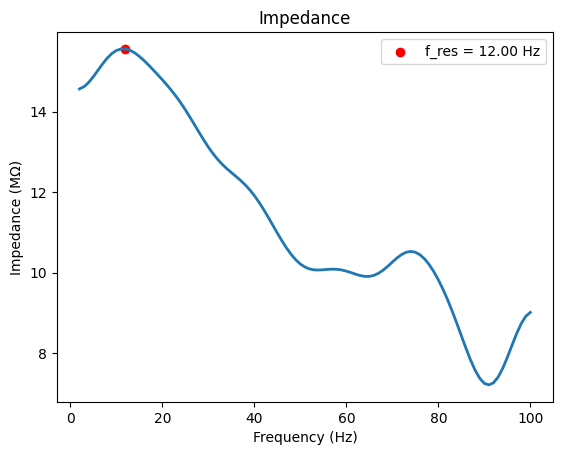

In [12]:
trim_time = 0
samples_to_trim = int(trim_time / dt)
Vs_trimmed = Vs[samples_to_trim:]
I_chirp_trimmed = I_chirp[samples_to_trim:]
min_len = min(len(Vs_trimmed), len(I_chirp_trimmed))
Vs_trimmed = Vs_trimmed[:min_len]
I_chirp_trimmed = I_chirp_trimmed[:min_len]
freq_cycles_1, Z_cycles_1 = compute_impedance_fft(
    Vs_trimmed, I_chirp_trimmed, dt, smooth_sigma=5, f_max=100
)
f_res_1 = freq_cycles_1[np.argmax(Z_cycles_1)]
Z_max_1 = Z_cycles_1.max()
plt.plot(freq_cycles_1, Z_cycles_1, lw=2)
plt.scatter(f_res_1, Z_max_1, color='red', label=f"f_res = {f_res_1:.2f} Hz")
plt.title("Impedance")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance (MΩ)")
plt.legend()
plt.show()

In [234]:
spike_times_by_freq = {}
freqs = np.linspace(1, 100, 100)

amp = 1

dt = 0.1
Gl, El = 0.1, -58
Ena, Ek, Eh = 60, -75, -32.9
Cm = 1
Gl2 = 0.1
p = 0.5
Gc = 1
Gm = 1#1.58
Gh = 0
Gnap =0.3
Gna = 55
Gk = 10

for freq in freqs:

        # ---------- sinusoidal input ----------
        phi = 2 * np.pi * freq * t / 1000.0
        I_theta = amp * np.sin(phi)

        # ---------- reset state ----------
        Vs = np.zeros(len(t))
        Vd = np.zeros(len(t))
        Hs = np.zeros(len(t))
        Hd = np.zeros(len(t))
        Zs = np.zeros(len(t))
        Zd = np.zeros(len(t))
        n  = np.zeros(len(t))
        h  = np.zeros(len(t))

        Vs[0] = El
        Vd[0] = El
        spike_time = []

    # ---------- simulation ----------
        for k in range(len(t) - 1):

                k1vs = (-Gl*(Vs[k]-El) - Gsd*(Vs[k]-Vd[k]) - Gm*Zs[k]*(Vs[k]-Ek)
                        - Gnap*pinf(Vs[k])*(Vs[k]-Ena)
                        - Gna*(minf(Vs[k])**3)*h[k]*(Vs[k]-Ena)
                        - Gk*(n[k]**4)*(Vs[k]-Ek)
                        + I_theta[k]) / Cm

                k1vd = (-Gl2*(Vd[k]-El) - Gh*Hd[k]*(Vd[k]-Eh)
                        - Gds*(Vd[k]-Vs[k])
                        + I_theta[k]) / Cm

                k1Hs = (Hinf(Vs[k]) - Hs[k]) / tauH(Vs[k])
                k1Hd = (Hinf(Vd[k]) - Hd[k]) / tauH(Vd[k])
                k1Zs = (Zinf(Vs[k]) - Zs[k]) / 75
                k1Zd = (Zinf(Vd[k]) - Zd[k]) / 75
                k1n  = (ninf(Vs[k]) - n[k]) / taun(Vs[k])
                k1h  = (hinf(Vs[k]) - h[k]) / tauh(Vs[k])

                avs = Vs[k] + k1vs * dt
                avd = Vd[k] + k1vd * dt
                aHs = Hs[k] + k1Hs * dt
                aHd = Hd[k] + k1Hd * dt
                aZs = Zs[k] + k1Zs * dt
                aZd = Zd[k] + k1Zd * dt
                an  = n[k]  + k1n  * dt
                ah  = h[k]  + k1h  * dt

                k2vs = (-Gl*(avs-El) - Gsd*(avs-avd) - Gm*aZs*(avs-Ek)
                        - Gnap*pinf(avs)*(avs-Ena)
                        - Gna*(minf(avs)**3)*ah*(avs-Ena)
                        - Gk*(an**4)*(avs-Ek)
                        + I_theta[k]) / Cm

                k2vd = (-Gl2*(avd-El) - Gh*aHd*(avd-Eh)
                        - Gds*(avd-avs)
                        + I_theta[k]) / Cm

                k2Hs = (Hinf(avs) - aHs) / tauH(avs)
                k2Hd = (Hinf(avd) - aHd) / tauH(avd)
                k2Zs = (Zinf(avs) - aZs) / 75
                k2Zd = (Zinf(avd) - aZd) / 75
                k2n  = (ninf(avs) - an) / taun(avs)
                k2h  = (hinf(avs) - ah) / tauh(avs)

                Vs[k+1] = Vs[k] + (k1vs + k2vs) * dt / 2
                Vd[k+1] = Vd[k] + (k1vd + k2vd) * dt / 2
                Hs[k+1] = Hs[k] + (k1Hs + k2Hs) * dt / 2
                Hd[k+1] = Hd[k] + (k1Hd + k2Hd) * dt / 2
                Zs[k+1] = Zs[k] + (k1Zs + k2Zs) * dt / 2
                Zd[k+1] = Zd[k] + (k1Zd + k2Zd) * dt / 2
                n[k+1]  = n[k]  + (k1n  + k2n)  * dt / 2
                h[k+1]  = h[k]  + (k1h  + k2h)  * dt / 2

                if Vs[k+1] > 0 and Vs[k] <= 0:
                        spike_time.append(t[k+1])
        # plt.plot(t, Vs)
        # plt.show()
        spike_times_by_freq[freq] = np.array(spike_time)


Text(0.5, 1.0, 'Firing Response to Sinusoidal Input')

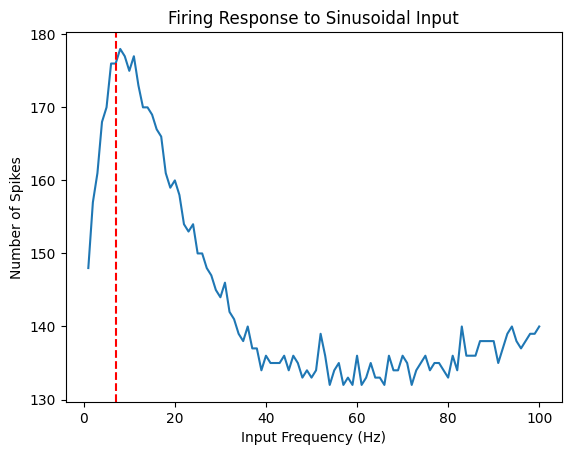

In [235]:
plt.plot(freqs, [len(spike_times_by_freq[freq]) for freq in freqs])
plt.axvline(x= 7, color='red', linestyle='--', label='Resonant Frequency')
plt.xlabel("Input Frequency (Hz)")
plt.ylabel("Number of Spikes")
plt.title("Firing Response to Sinusoidal Input")